In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
# Load data sets
tweets = pd.read_csv("F:\Assignments\Text Mining\Elon_musk.csv",encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
# rename the text column
tweets = tweets.rename({'Text': 'text'}, axis=1)

In [5]:
tweets.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Text Preprocessing

In [6]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
tweets['text'] = tweets.text.apply(clean)
tweets.text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [8]:
tweets = [text.strip() for text in tweets.text] # remove both the leading and the trailing characters
tweets = [text for text in tweets if text] # removes empty strings, because they are considered in Python as False
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [9]:
# Joining the list into one string/text
tweets_text = ' '.join(tweets)
len(tweets_text)  #130001

130001

In [10]:
print(tweets_text[0:500])

im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge
all thought he would fail
himself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome 


In [11]:
# Tokenization
from nltk.tokenize import word_tokenize
tweets_tokens = word_tokenize(tweets_text)
print(tweets_tokens[0:500])

['i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'givedirectly', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can',

In [12]:
len(tweets_tokens)    #19609

19609

In [13]:
# Stopwords
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweets_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys', '

In [14]:
len(no_stop_tokens)     #13414

13414

In [15]:
# Noramalize the data
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely']


In [16]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

C:\Users\anupsv\AppData\Roaming\Python\Python39\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:40])

im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'think', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy']


# Feature Extaction
# 1. Using CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [20]:
print(cv.get_feature_names()[100:200])

['alien', 'align', 'all', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'aloha', 'alone', 'along', 'aloysiusfekete', 'alpha', 'already', 'also', 'altho', 'although', 'altit', 'altitude', 'alto', 'aluminum', 'alvianchoiri', 'always', 'am', 'amaze', 'amazing', 'amazon', 'america', 'american', 'amoghbhushan', 'amount', 'amp', 'amplification', 'amplitude', 'amyceskridge', 'analog', 'analysis', 'anandmahindra', 'anasisii', 'anbuteau', 'ancient', 'and', 'andrej', 'andrewbogut', 'andyjstanton', 'angle', 'ankitxupta', 'annerajb', 'annihila', 'announce', 'annoying', 'anode', 'another', 'answer', 'antenna', 'antibody', 'antonioetayo', 'antonkanerva', 'anvithvittal', 'anybody', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'aoc', 'aok', 'apart', 'apogee', 'apologist', 'apompliano', 'app', 'appeal', 'appear', 'apple', 'apply', 'applying', 'appreciate', 'appreciated', 'approach', 'approval', 'approve', 'approximate', 'approximately', 'approximation', 'april', 'aquatic', 'arbeit', '

G:\IDE\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(tweetscv.toarray().shape)   # (13419, 3958)

(13419, 3968)


# 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [23]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [24]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'big', 'booster', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'engineersfeed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'one', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'thesheetztweetz', 'think', 'time', 'tobyliiiiiiiiii', 'true', 'try', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'work', 'would', 'yeah'

# 3. TF-IDF Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [26]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'become', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'catch', 'cell', 'chance', 'change', 'cleantechnica', 'close', 'cold', 'color', 'come', 'commaai', 'commercialcrew', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'day', 'deep', 'definitely', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', 

In [27]:
clean_tweets=' '.join(lemmas)
clean_tweets

'i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel try joerogan spotify great interview doge underestimate teslacn congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge think would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweet definitely represent realworld time allocation entertain outcome likely givedirectly send agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private key avoid cost freewalletorg app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp economic e

# Generate Word Cloud

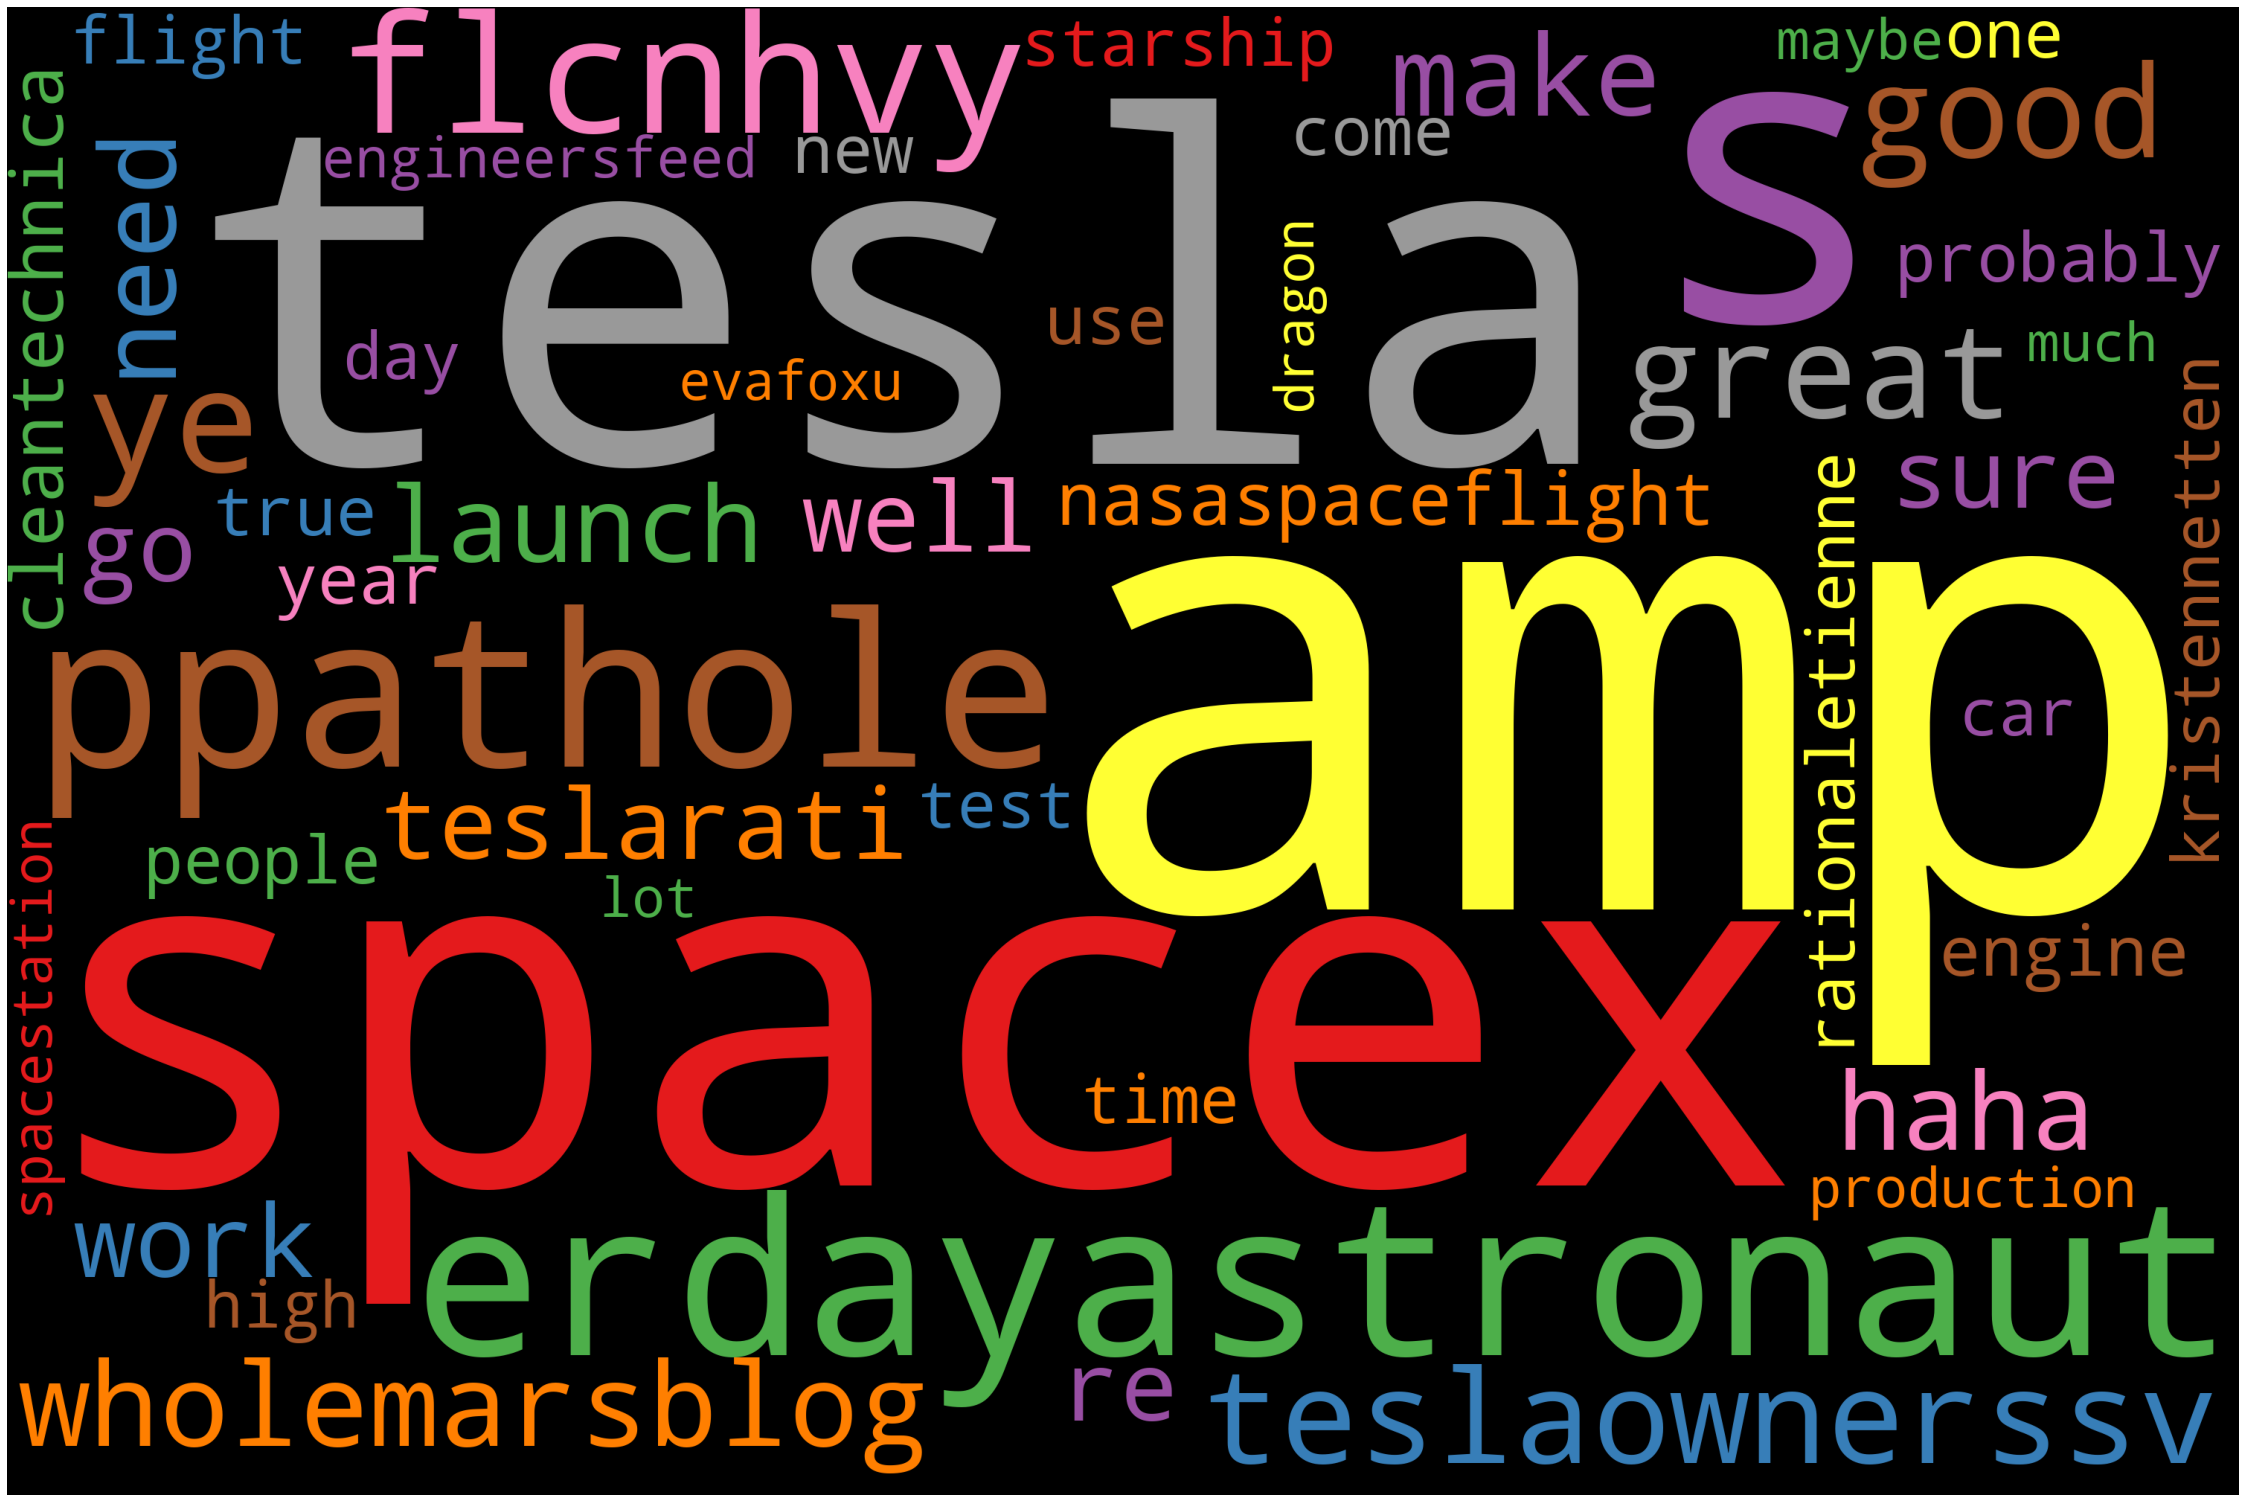

In [28]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [29]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [30]:
for token in doc_block[500:600]:
    print(token, token.pos_)

tough ADJ
one NUM
rt PROPN
spacex PROPN
watch PROPN
falcon PROPN
launch PROPN
starlink PROPN
satellite PROPN
httpstcobjfjlczwdk PROPN
twitter PROPN
fill NOUN
graffiti PROPN
art PROPN
eiraum PROPN
giga PROPN
berlin PROPN
progress PROPN
hamoon PROPN
neuralink PROPN
neuralink PROPN
work NOUN
super ADV
hard ADV
ensure VERB
implant ADJ
safety NOUN
amp VERB
close ADJ
communication NOUN
rt PROPN
spacex PROPN
mission NOUN
enable VERB
access NOUN
everyday ADJ
people NOUN
dream VERB
go VERB
space PROPN
rt PROPN
spacex PROPN
announce PROPN
first PROPN
commercial PROPN
astronaut PROPN
mission PROPN
orbit PROPN
earth PROPN
aboard ADP
dragon PROPN
httpstcombesvnakad VERB
httpstcouklsjffrjk PROPN
youve PROPN
work NOUN
advanced ADJ
wearables ADJ
phone NOUN
robot NOUN
skill NOUN
need VERB
neuralink NOUN
feel VERB
weird ADJ
help NOUN
make VERB
hopefully ADV
good ADJ
version NOUN
cyberpunk NOUN
come VERB
true ADJ
please INTJ
consider VERB
work NOUN
neuralink PROPN
shortterm PROPN
solve PROPN
brainspine 

In [31]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[500:600])

['mean', 'civilization', 'rock', 'starlink', 'orbit', 'launch', 'landing', 'booster', 'ratelimite', 'part', 'process', 'cell', 'production', 'change', 'truck', 'stick', 'traffic', 'generate', 'gas', 'amp', 'particulate', 'cast', 'machine', 'try', 'make', 'fullsize', 'car', 'tegmark', 'owensparks', 'manufacturing', 'technology', 'volume', 'industry', 'food', 'amp', 'beverage', 'toy', 'battery', 'cell', 'production', 'ratelimiter', 'energy', 'pr', 'pferragu', 'look', 'question', 'fsd', 'view', 'erdayastronaut', 'virginorbit', 'congratulation', 'teslaownerssv', 'mrbeastyt', 'whistle', 'cybertruck', 'need', 'garage', 'point', 'signalapp', 'code', 'divide', 'point', 'thing', 'call', 'money', 'information', 'system', 'labor', 'allocation', 'erdayastronaut', 'twist', 'knife', 'erdayastronaut', 'erdayastronaut', 'we\x92re', 'make', 'improvement', 'ease', 'engine', 'hour', 'engine', 'need', 'repair', 'switch', 'school', 'internship', 'apply', 'college', 'volume', 'production', 'cash', 'flow', '

In [32]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,amp,89
1,make,64
2,launch,47
3,year,45
4,need,45
5,work,45
6,go,42
7,come,41
8,teslaownerssv,39
9,ppathole,39


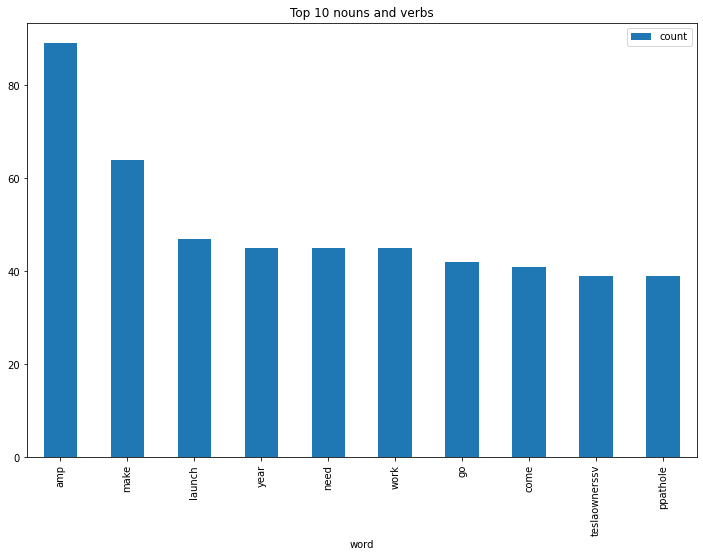

In [33]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [35]:
tweets = pd.read_csv("F:\Assignments\Text Mining\Elon_musk.csv",encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets = tweets.rename({'Text': 'text'}, axis=1)

In [36]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [37]:
tweets['text'] = tweets.text.apply(clean)

In [38]:
tweets = [text.strip() for text in tweets.text] 
tweets = [text for text in tweets if text] 
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [39]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(tweets))
sentences

['i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freewalletor

In [40]:
sent_df = pd.DataFrame(tweets,columns=['sentence'])
sent_df

,sentence
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1969,flcnhvy true it sounds so surreal but the nega...
1970,ppathole make sure to read ur terms amp condit...
1971,teslagong ppathole samwise gamgee
1972,ppathole altho dumb and dumber is


In [42]:
affin = pd.read_csv("F:\Assignments\Text Mining\Afinn.csv", sep=',', encoding='latin-1')

In [43]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

C:\Users\anupsv\AppData\Roaming\Python\Python39\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [45]:
# manual testing
calculate_sentiment(text='great')

3

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3      -1
4       6
       ..
1969   -3
1970    1
1971    0
1972   -6
1973    2
Name: sentiment_value, Length: 1974, dtype: int64

In [47]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
182,naval also the road to hell is mostly paved w...,-7
1972,ppathole altho dumb and dumber is,-6
1695,neuroskeptic they dont fire all at once some ...,-6
1377,lvaux kulpability tlowdon ethicalskeptic peopl...,-5
1950,rationaletienne flcnhvy ppathole ihearttesla d...,-5
...,...,...
1158,thanks tesla team for great work on deliveries...,10
452,teslaownerssv it will get absurdly good tesla ...,10
462,picotjohn cyberpunkgame its a good to great g...,10
1289,one way or another excitement guaranteed suppo...,11


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1974.000000
mean        0.738095
std         1.826426
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [49]:
#count    1974.000000
#mean        0.738095
#std         1.822537
#min        -7.000000
#25%         0.000000
#50%         0.000000
#75%         2.000000
#max        12.000000
#Name: sentiment_value, dtype: float64

In [50]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
3,doge is underestimated,-1
6,frodo was the underdoge\nall thought he would ...,-2
8,flcnhvy indeed tweets definitely do not repre...,0
...,...,...
1967,ai symbiosis while u wait,0
1968,flcnhvy theres some of that too,0
1969,flcnhvy true it sounds so surreal but the nega...,-3
1971,teslagong ppathole samwise gamgee,0


In [51]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value
2,joerogan spotify great interview,3
4,teslacn congratulations tesla china for amazin...,6
5,happy new year of the ox,3
7,owensparks flcnhvy haha thanks,5
9,the most entertaining outcome is the most likely,2
...,...,...
1962,ppathole ihearttesla for sure this is both gre...,3
1963,redmercy yes,1
1964,buzzindelhi sorry should hopefully be soon,1
1970,ppathole make sure to read ur terms amp condit...,1


In [52]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,im an alien,0,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0,1
2,joerogan spotify great interview,3,2
3,doge is underestimated,-1,3
4,teslacn congratulations tesla china for amazin...,6,4
...,...,...,...
1969,flcnhvy true it sounds so surreal but the nega...,-3,1969
1970,ppathole make sure to read ur terms amp condit...,1,1970
1971,teslagong ppathole samwise gamgee,0,1971
1972,ppathole altho dumb and dumber is,-6,1972


G:\IDE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

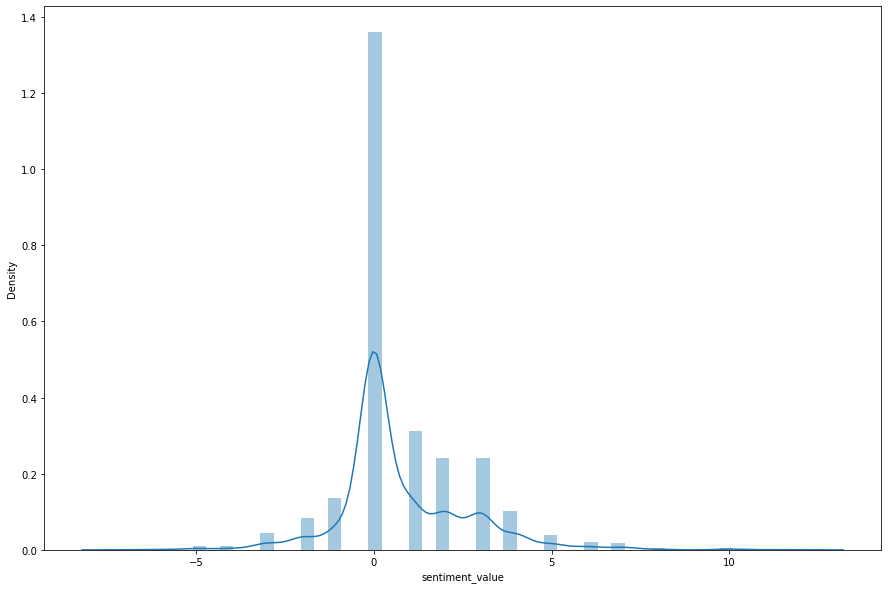

In [53]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

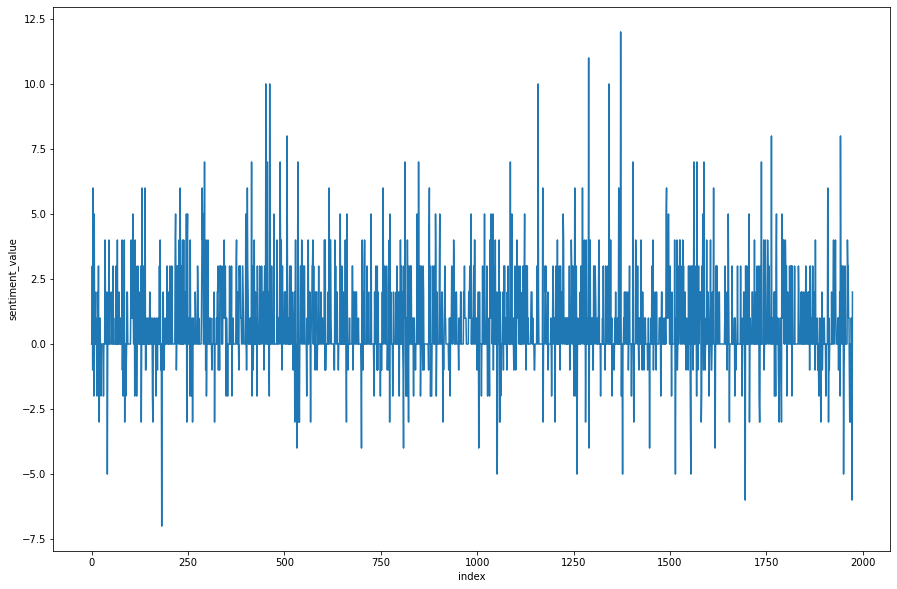

In [54]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)